# <center> <span style='color:#3c3b5f'>Prediciendo precios de casas</span></center>

En este ejercicio intentaremos predecir el precio de casas ubicadas en la región de california. El dataset a utilizar se llama *California Housing Prices dataset* del repositorio de StatLib.

La idea es entrenar un modelo que aprenda de los datos y sea capaz de predecir el precio medio de una casa de cualquier distrito en base a diferentes métricas y características dentro del set de datos.

Taller 2 - Hackathon ICC 2022/2023.

*Autor*: MSc. Bioing. BALDEZZARI Lucas

## <span style='color:#f06553'>Preguntas importantes</span>

- ¿Cuál es nuestro objetivo? ¿Qué buscamos?
- ¿A quien se lo mostraremos? 
- ¿Para qué y cómo debemos utilizar/mostrar los resultados obtenidos previamente a entrenar el modelo predictivo y luego de entrenar el modelo?
- ¿Queremos predecir un precio o realizar una categorización? ¿Con qué tipo de problema ML nos estamos enfrentando? 

## <span style='color:#f06553'>Carga del set de datos</span>

Lo primero que debemos hacer es cargar el set de datos.

Como hemos mencionado, utilizaremos el set de datos de *precios de hogares del estado California*. El mismo se encuentra dentro de *dataset/housing* o bien pueden descargarlo de internet.

##### Importando librerías y módulos

A continuación importaremos las librerías y módulos que utilizaremos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from utils import loadDS #importamos funciones creadas por nosotros

##### Abriendo set

Utilizamos la función *loadDS()* para cargar el dataset.

In [2]:
path = os.path.join("datasets", "housing")

ds = loadDS(path, "housing.csv") #cargamos el data set en la variabl ds

### <span style='color:#229954'>Análisis rápido de la estructura de los datos</span>

Una de las partes más importantes en el análisis de datos, previo a entrenar un algorítmo de machine learning, es conocer cómo esta conformado nuestro data set, es decir, qué tipos de datos contiene, en qué cantidad, entre otras cosas.

Utilizaremos *[Pandas](https://pandas.pydata.org/)* para analizar y manipular el set de datos.

Veamos.

In [3]:
## Imprimimos las primeras 5 filas
ds.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


El método o función *head()* nos permite ver en pantalla las primeras cinco filas de nuestro set de datos.

**Importante**
- Cada **fila** representa un **distrito** o una parte de un territorio.
- Cada **columna** representa una **característica** también llamado **atributo** o **variable**. Las columnas representan las variables **independientes**. Por otro lado, la columna que será el *target vector* es llamada **variable dependiente**.

En nuestro caso, tenemos las/los siguientes características/atributos, *longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, median_house_value y ocean_proximity*.

¿Cómo podemos saber de qué tipo son estos datos? ¿Cuantos de cada uno de estos hay?

Podemos usar la función *info()*.

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Podemos ver lo siguiente:
    
- Todos los atributos poseen un total de 20640 valores, salvo total_bedrooms que posee solo 20433. Es decir, tenemos datos faltantes en dicha columna y deberemos ocuparnos de esto.
- Todos los atributos son del tipo flotante, excepto el atributo *ocean_proximity*. Dado que hemos cargado el dataset desde un archivo csv, el tipo de datos en esos atributos sean del tipo *string*.

Si prestamos atención las cinco filas que hemos obtenido al hacer *housing.head()* podremos notar que *ocean_proximity* es claramente una variable del tipo *categórica*.

In [7]:
ds["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Vemos que tenemos cinco categorías.

Utilizando el método *describe()* podemos obtener valores estadísticos para cada uno de las *características numéricas* que conforman nuestro data set.

In [9]:
ds.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Podríamos obtener un resumen sólo de algunos atributos.

In [10]:
caracteristicas = ["housing_median_age","total_rooms","total_bedrooms","population","households"]
ds[caracteristicas].describe()

,housing_median_age,total_rooms,total_bedrooms,population,households
count,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000
mean,28.639486,2635.763081,537.870553,1425.476744,499.539680
std,12.585558,2181.615252,421.385070,1132.462122,382.329753
min,1.000000,2.000000,1.000000,3.000000,1.000000
25%,18.000000,1447.750000,296.000000,787.000000,280.000000
50%,29.000000,2127.000000,435.000000,1166.000000,409.000000
75%,37.000000,3148.000000,647.000000,1725.000000,605.000000
max,52.000000,39320.000000,6445.000000,35682.000000,6082.000000


#### Histogramas

Una forma rápida de analizar la distribución de nuestros datos es usando *histogramas*. A través de pandas y matplotlib podemos rápidamente graficarlos.

*Importante:* Actualmente estamos trabajando un set de datos pequeño, no obstante, en general es habitual trabajar con cientos de miles (o millones) de muestras (filas). En esos casos, deberemos utilzar una parte del set de datos para el análisis.

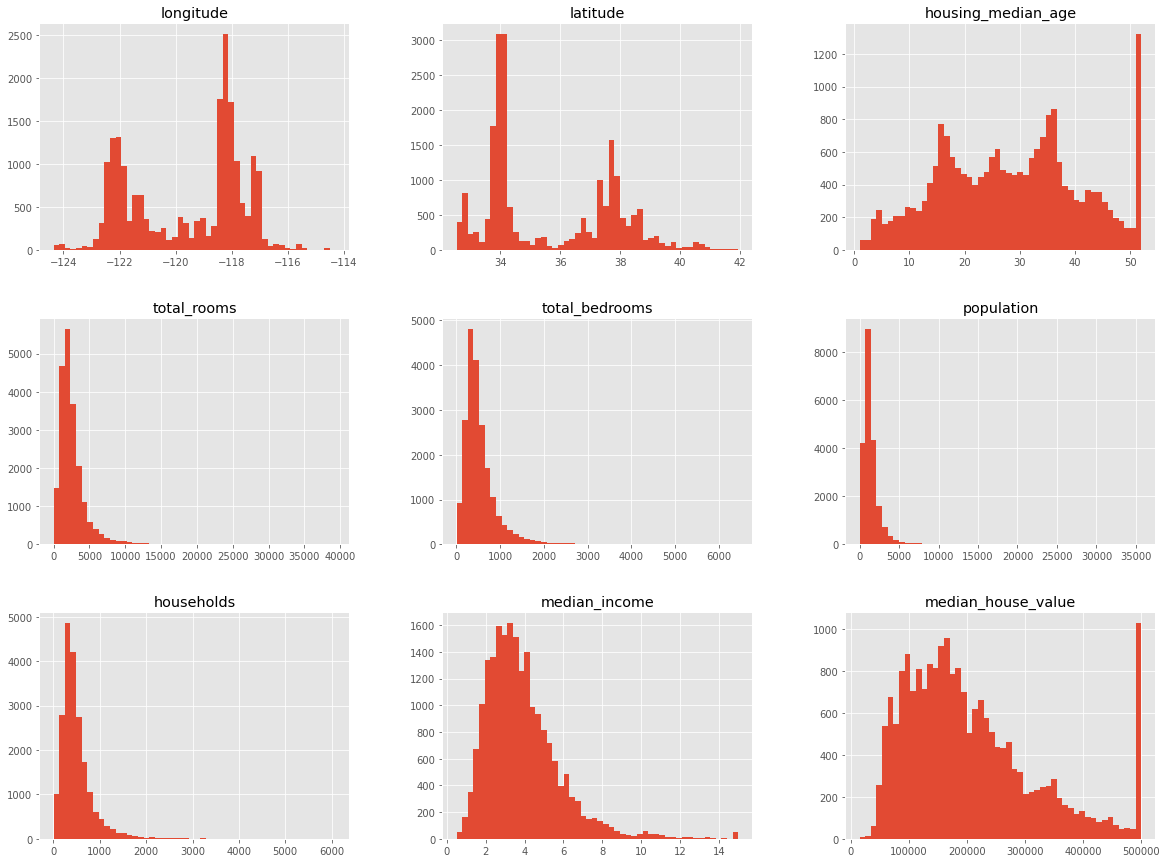

In [11]:
## Graficando histogramas
plt.style.use("ggplot")
ds.hist(bins=50, figsize=(20,15))
plt.show()

Debemos prestar atención a lo siguiente:

- *median_income*: ¿Podemos decir que el ingreso de las personas que habitan la zona bajo análisis va de 0 a 15USD? Evidentemente eso no puede ser. No obstante, los valores de ingreso de las personas han sido *escalados*, es decir, *procesados* previamente. 
- *housing_median_age* y *median_house_value*: ¿Qué significa la barra lateral derecha de gran altura? Podría decirnos que cuando se realizó el censo existía un *límite* a la hora de registrar los valores. A modo de ejemplo, si *median_house_value* de una casa superaba los 500000 se la anotaba de todos modos como de 500000. Deberemos tener en cuenta esto a la hora de entrenar nuestro algorítmo ya que podría generar sesgos o mala performance.
- Los atributos poseen **diferentes escalas**. Esto deberá ser trabajado para un correcto entrenamiento del algoritmo.
- Debemos notar que algunos atributos poseen una distribución conocida como de "*cola-pesada*" o "*tail-heavy*". Es importante mencionar esto porque muchos algoritmos de ML esperan distribuciones normales, por suerte existen formas de mejorar estas distribuciones para así obtener buenos resultados por parte de nuestros algoritmos.

## <span style='color:#f06553'>Dividiendo los datos en set de entrenamiento y set de testeo</span>

Antes de entrenar un algoritmos de ML y probarlo, lo que debemos hacer es **dividir** nuestros datos en un **set de entrenamiento** y en un **set de testeo**, luego **no debemos estudiar/mirar nunca lo que tenemos en este último set**.

Es habitual separar los datos en 80% para entrenamiento y 20% para testeo. El set de entrenamiento se utiliza para entrenar y validar nuestros alogirtmos, mientras que el set de testeo, el cual se supone nunca fue "*visto*" por nuestro algoritmo, se utiliza para determinar la performance del mismo.

Existen otras alternativas como puede verse en el siguiente artículo [3.1. Cross-validation: evaluating estimator performance](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation), el cual veremos en talleres futuros.

La API de Scikit-Learn provee algunas funciones para separar los datasets en mútiples subsets de varias maneras. La función más simple y muy utilizada es la función [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Utilizemosla para separar nuestros datos en $80%$ como set de entrenamiento y $20%$ como set de testeo.

In [12]:
from sklearn.model_selection import train_test_split

trainSet, testSet = train_test_split(ds, test_size=0.2, random_state=42)

In [13]:
print(len(trainSet)/len(ds)*100)
print(len(testSet)/len(ds)*100)

80.0
20.0


#### <span style='color:#229954'>Muestra homogenea o *estratificada**</span>

Debemos saber que el método *train_test_split()* realiza un muestreo **aleatorio**. Esto esta bien si el set de datos es lo suficientemente grande (especialmente relativo al número de características -columnas-), pero si esto no es así, corremos el riesgo de introducir lo que se conoce en estadística como **bias** o **sesgo**, lo que llevará a que nuestro modelo funcione mal.

Pongamos un ejemplo, cuando se desea hacer una encuesta a 1000 personas, no se eligen aleatoreiamente 1000 personas con un 50% hombres y un 50% mujeres, sino que se busca que sea una muestra representativa de la población total. Supongamos que la población de Uruguay es 52% mujeres y 48% hombres, lo que se debe hacer es seleccionar 520 mujeres y 480 hombres. Esto se llama **muestra estratificada**, es decir, se divide la muestra en partes *homogeneas* llamadas *estratos*. Entonces, cada nueva muestra es muestreada de la población total considerando estos estratos, de esta manera se garantiza de que la muestra tomada, es decir, *testSet*, sea representativa del total de datos.

#### Homogeneizando los datos a partir de *median_income*

Supongamos que el ingreso medio de cada habitante de California es un atributo importante a tener en cuenta para predecir el precio promedio de una casa. Debemos asegurarnos entonces de que el set de testo sea representativo de las categorías de ingreso de todo el set de datos. Dado que el ingreso medio es una variable continua, lo primero que debemos hacer es generar categorías.

Observando los histogramas anteriores, podemos notar que los valores de ingreso medio (*median_income*) se concentran entre 1.5 y 6, es decir, entre $\$15000$ y $\$60000$, pero algunos ingresos van más allá de 6. Es sumamente importante tener una cantidad suficiente de valores de cada categoría dentro del set para tener un *balance* adecuado y así  evitar el *bias* entre los ingresos medios, es decir, si tenemos un desbalance entre los datos, los algoritmos podrían tener un *sesgo/bias* hacia los valores entre $\$15000$ y $\$60000$.

Utilizaremos la función de pandas *cut()* para dividir los datos de *median_income* en cinco categorías etiquetadas de 1 a 5. Agregaremos una columna al set de datos llamada *categoriaIngreso*.

Veamos.

In [14]:
ds["categoriaIngreso"] = pd.cut(ds["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])
ds["categoriaIngreso"]

0        5
1        5
2        5
3        4
4        3
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: categoriaIngreso, Length: 20640, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

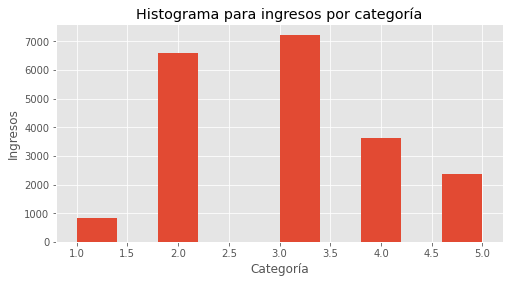

In [15]:
ds["categoriaIngreso"].hist(figsize=(8,4))
plt.title("Histograma para ingresos por categoría")
plt.xlabel("Categoría")
plt.ylabel("Ingresos")
plt.show()

Utilizaremos [StratifiedShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html) para obtener datos de entrenamiento balanceados.

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for indicesTrain, indicesTest in split.split(ds, ds["categoriaIngreso"]):
    trainSetEstratificado = ds.loc[indicesTrain]
    testSetEstratificado = ds.loc[indicesTest]

In [17]:
dic = {"fullSet": np.array(ds["categoriaIngreso"].value_counts() / len(ds)),
       "estratificado":np.array(trainSetEstratificado["categoriaIngreso"].value_counts() / len(trainSetEstratificado))}

propor = pd.DataFrame(data=dic)
propor["diferencia%"] = (propor["fullSet"]-propor["estratificado"])*100
propor

,fullSet,estratificado,diferencia%
0,0.350581,0.350594,-0.001211
1,0.318847,0.318859,-0.001211
2,0.176308,0.176296,0.001211
3,0.114438,0.114462,-0.002422
4,0.039826,0.039789,0.003634


Podemos ver que el error porcentual entre los datos originales y los tomados a partir de *StratifiedShuffleSplit()* poseen un bajo erroy, por lo tanto podemos decir que están balanceados.

Ahora eliminamos la columna *categoriaIngreso*.

In [18]:
for set_ in (trainSetEstratificado, testSetEstratificado):
    set_.drop("categoriaIngreso", axis=1, inplace=True)

### <span style='color:#f06553'>Visualizando y analizando los datos</span>

Antes que nada, debemos recordar que **solamente debemos trabajar sobre los datos de entrenamiento y NUNCA *mirar* los datos dentro del set de testeo**.

En ocasiones podríamos tener un set de entrenamiento muy grande, en estos casos es posible tomar una parte del mismo para hacer un análisis más ágil.

Vamos a crear una copia del set de datos *trainSetEstratificado* para no modificar el set de entrenamiento original.

In [22]:
## Creamos una copia de los datos de entrenamiento para no modificar los datos
trainSetCopy = trainSetEstratificado.copy()
trainSetCopy.shape

(16512, 10)

#### <span style='color:#229954'>Visualizando datos geográficos</span>

Sabemos que dentro del set de datos tenemos variables de latitud y longitud, las cuales nos representan datos geográficos. Aprovechemos estos datos y obtengamos algo de información de cómo se distribuyen las casas donde se han abtenidos los datos.

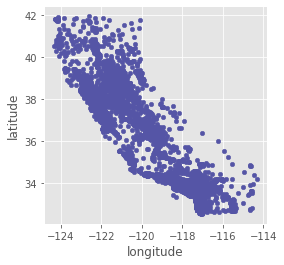

In [23]:
trainSetCopy.plot(kind = "scatter", x = "longitude", y = "latitude", figsize=(4,4), color = "#5555a6")
plt.show()

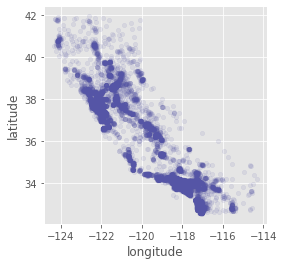

In [24]:
trainSetCopy.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.1,figsize=(4,4), color = "#5555a6")
plt.show()

Los gráficos nos aportan bastante información. Podemos notar cierta concentración de hogares cerca de la costa del pacífico.

Aprovechemos las funcionalidades de la librería *Seaborn* para obtener un gráfico más informativo. Vamos a realizar un *gráfico de dispersión* a partir de la longitud y latitud, pero cada punto tendrá un color diferente en función del *median_house_value* y a su vez, el área del círculo estará en función de la población en cada distrito.

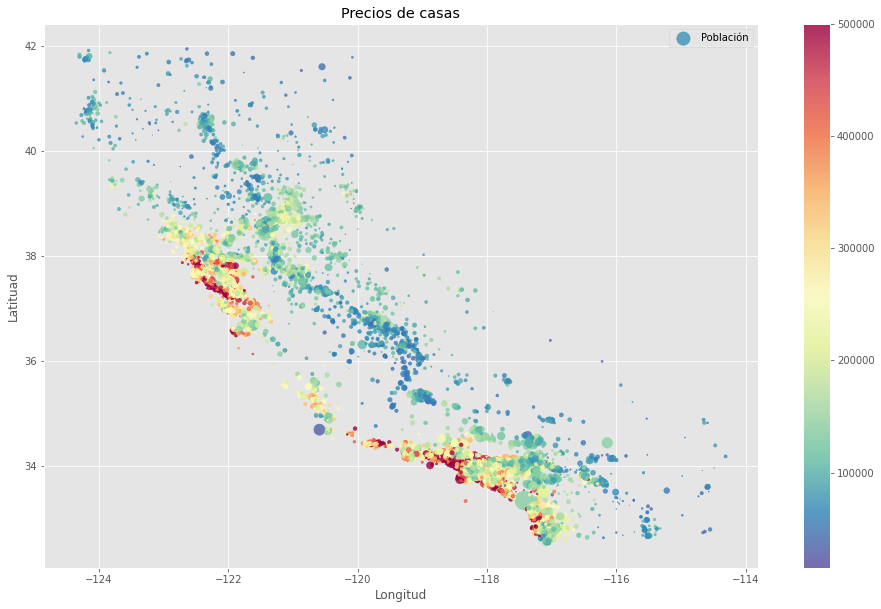

In [29]:
plt.figure(figsize = (16,10))
plt.scatter(trainSetCopy['longitude'] , trainSetCopy['latitude'] , c = trainSetCopy['median_house_value'],
            cmap="Spectral_r", alpha = 0.8, label = "Población", s = trainSetCopy["population"]/100)
plt.colorbar()
plt.xlabel("Longitud")
plt.ylabel("Latituad")
plt.title("Precios de casas")
plt.legend()
plt.show()

Podríamos graficar esta información sobre un mapa del estado de California.

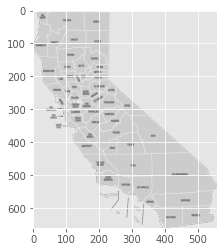

In [30]:
#Cargamos un mapa del estado de California
mapa = plt.imread("californiamap2.png")
plt.imshow(mapa)
plt.show()

Utilizamos el mapa cargado como "*fondo*".

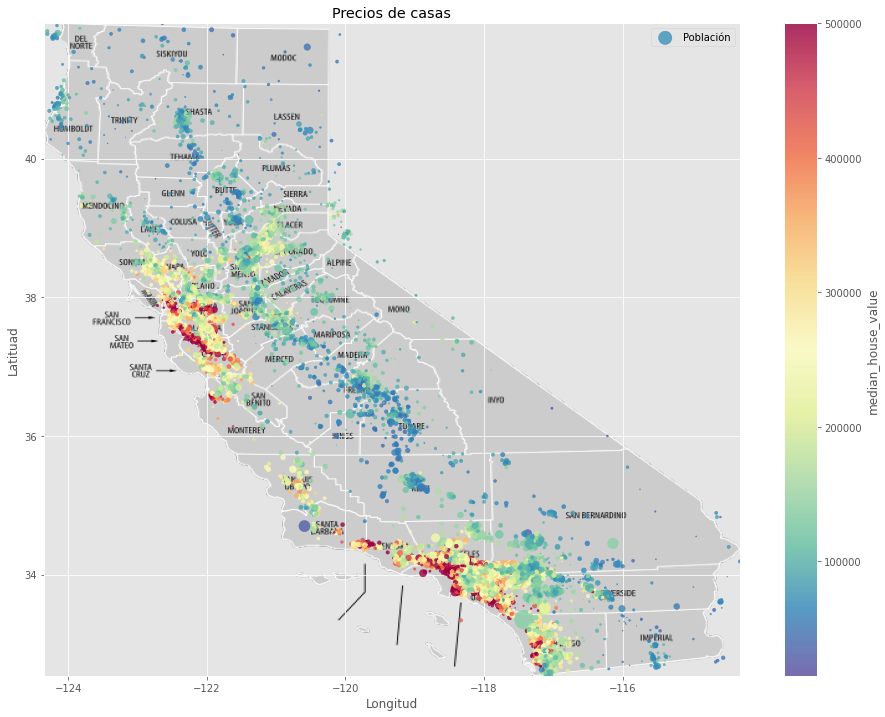

In [32]:
plt.figure(figsize=(16, 12))
plt.imshow(mapa,zorder=0,extent=[ds['longitude'].min(),ds['longitude'].max(),ds['latitude'].min(),ds['latitude'].max()])
ax = plt.gca()

pts = plt.scatter(trainSetCopy['longitude'] , trainSetCopy['latitude'] , c = trainSetCopy['median_house_value'],
            cmap="Spectral_r", alpha = 0.8, label = "Población", s = trainSetCopy["population"]/100)

bar = plt.colorbar()
bar.set_label('median_house_value')

plt.xlabel("Longitud")
plt.ylabel("Latituad")
plt.title("Precios de casas")

plt.legend()
plt.show()

¿Qué información podemos obtener del gráfico de dispersión anterior?

En principio podríamos decir que los precios están muy relacionados con la localización de las casas, es evidente que las casas sobre la costa son más caras, a excepción del norte del estado. La población es otro factor importante a la hora de considerar el precio. Un algoritmo de clustering podría ser utilizado para encontrar los grupos principales y agregar nuevas características a mis datos.

Finalmente, uno podría prensar que la proximidad al oceano, el cual es dato dentro del dataset, es un parámetro que encarece las casas, pero como hemos mencionado, esto no se cumple para la parte norte de california.

### <span style='color:#229954'>Analizando correlaciones</span>

Una herramienta muy potente a a hora de seleecionar qué características utilizaremos para entrenar nuestro modelo es el uso de **correlación**.

Como su nombre lo indica, la correlación mide el grado de relación entre variables. Existen diferentes métodos. Aquí utilizaremos la función *[corr()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)* propia de Pandas. El mismo se conoce como *Correlación de Pearson* o *correlación estándar*.

In [35]:
# correlaciones = trainSetCopy.drop("ocean_proximity").corr()
correlaciones = trainSetCopy.drop("ocean_proximity",axis=1).corr()
correlaciones

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


Veamos como se correlacionan las variables del set de datos con la variable *median_house_value*.

In [38]:
correlaciones["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

##### Observaciones

Podemos notar una correlación alta (más del 68%) entre el precio medio de una casa y el ingreso meido del distrito.

Podríamos también generar un *heatmap* utilizando *Seaborn* para ver cómo se correlacionan nuestras variables en una matriz.

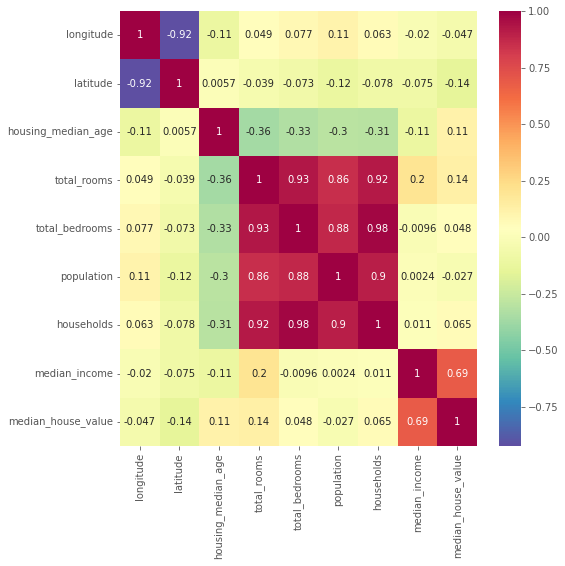

In [39]:
plt.figure(figsize=(8,8))
sns.heatmap(correlaciones, annot=True, cmap = "Spectral_r")
plt.show()

##### <span style='color:#229954'>Utilizando gráficos de dispersión para observar correlaciones</span>

Utilizando el método *scatter_matrix()* propio de Pandas obtenemos un gráfico de dispersión que nos permite observar la presencia o no de correlación entre las variables. 

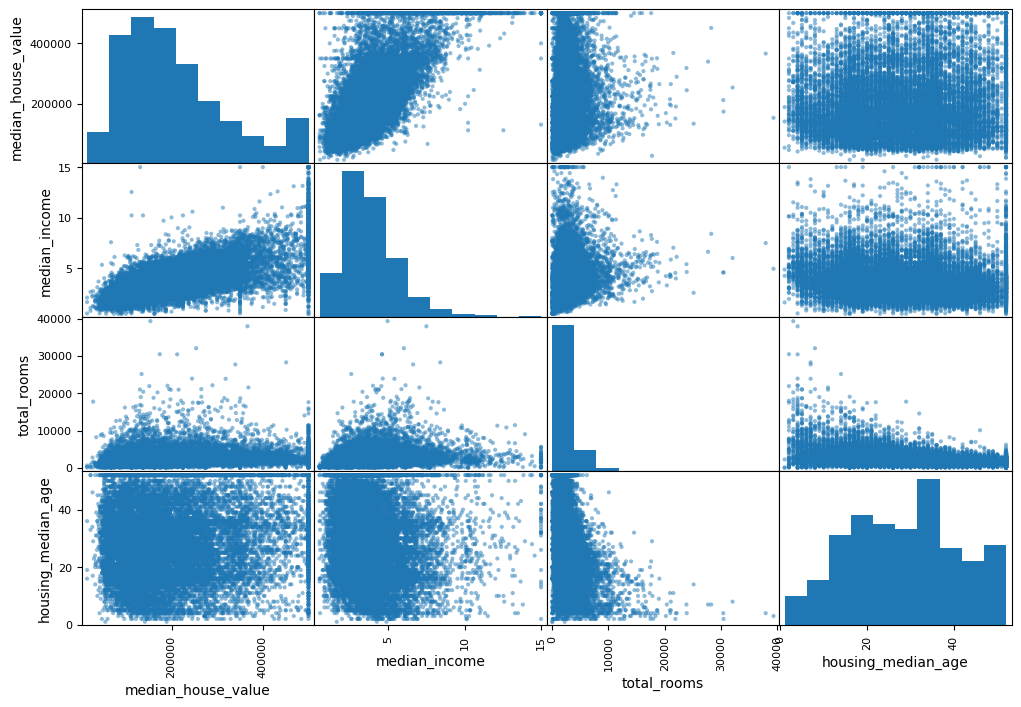

In [40]:
from pandas.plotting import scatter_matrix

plt.style.use("default")

columnas = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(trainSetCopy[columnas], figsize=(12, 8))

plt.show()

La diagonal principal muestra el hisograma de cada columna (variable) dentro del set de datos utilizado para graficar.


Otra alternativa es utilizar la función *pairplot()* de *Seaborn*. A la misma podríamos agregarle información acerca de la proximidad de las casas al oceano para ver como se distribuyen los datos.

Veamos.

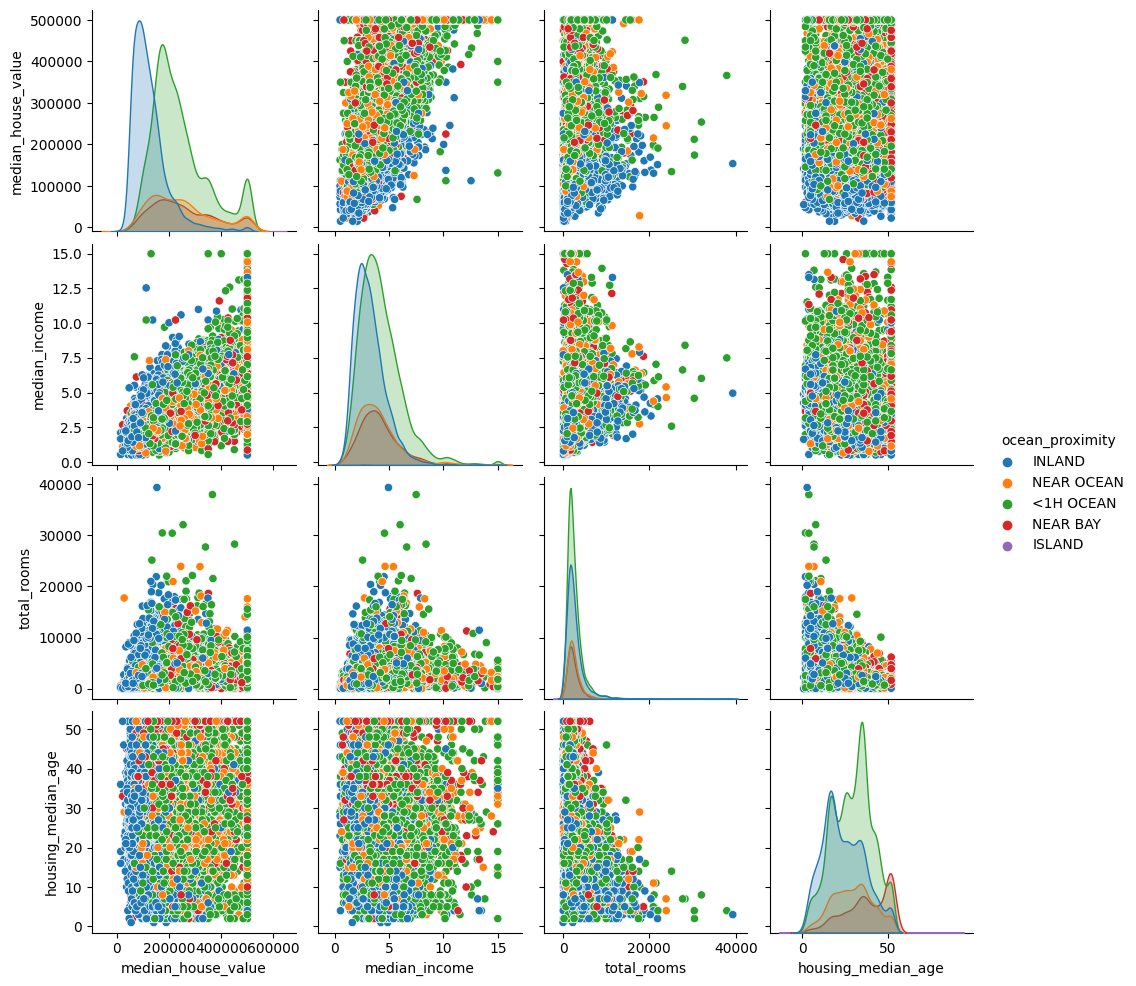

In [41]:
columnas2 = ["median_house_value", "median_income", "total_rooms", "housing_median_age","ocean_proximity"]
sns.pairplot(trainSetCopy[columnas2], hue = "ocean_proximity")
plt.show()

Por lo que hemos visto, una de las características más prometedora para predecir el precio de las casas es el *median_income*. Analicemos más de cerca estos datos.

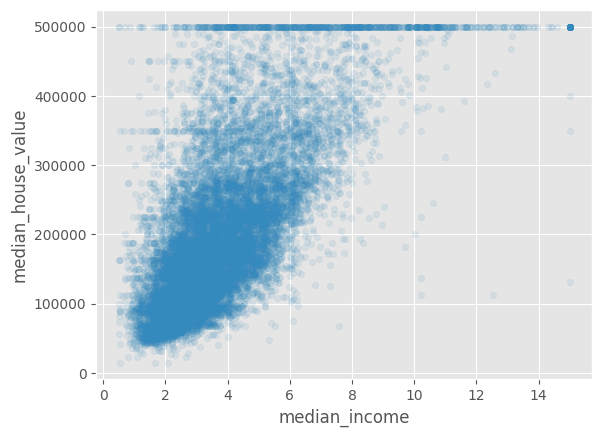

In [42]:
plt.style.use("ggplot")
trainSetCopy.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.show()

El gráfico de dispersión anterior nos informa de algunas cosas. En primer lugar, la correlación es fuerte, podemos ver una tendencia *creciente* entre los ingresos medios y los precios medios de las casas. Por otro lado, vemos una clara linea horizontal en los 500mil USD (cosa que ya hemos notado anteriormente en los histogramas). Por otro lado, podemos notar otras leves lineas horizontales alrededor de los 450mil y los 350mil, y otras por debajo. No sería mala idea *remover* esos distritos para prevenir que los algorimos aprendan de estos *rasgos*.

La librería *Seaborn* ofrece algunas herramientas de graficación sumamente útiles, veamos.

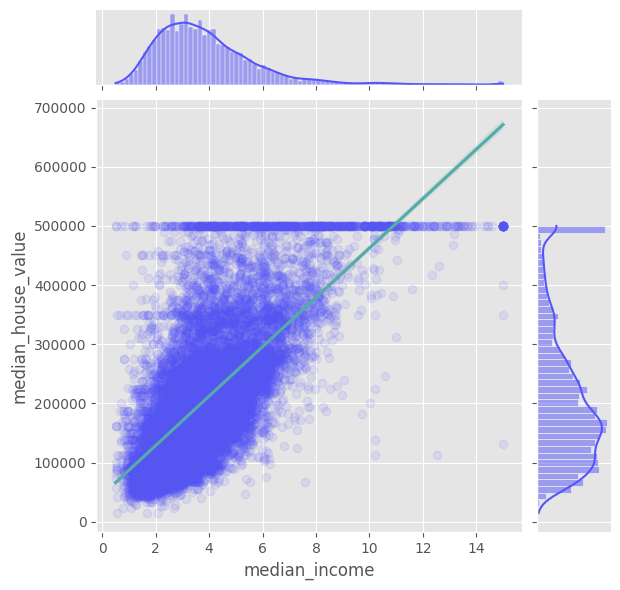

In [43]:
sns.jointplot(data = trainSetCopy, x = "median_income", y = "median_house_value",  kind = 'reg', color='#5555fa',
             joint_kws = {'line_kws':{'color':'#55aaaa'}, 'scatter_kws': {'alpha': 0.1}})

plt.show()

La línea de color verde de la gráfica anterior nos marca la tendencia existente entre *median_income* y *Median_house_value*.

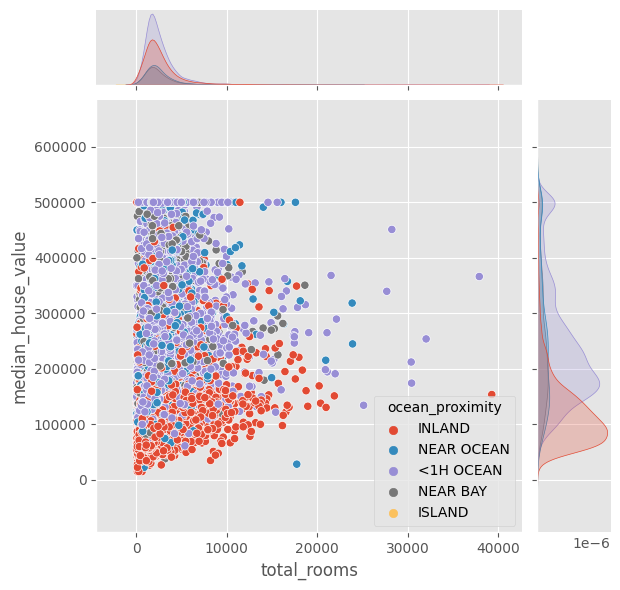

In [44]:
sns.jointplot(data = trainSetCopy, x = "total_rooms", y="median_house_value",  color='b', hue = "ocean_proximity")
plt.show()

### <span style='color:#f06553'>Combinando características</span>

Una forma muy habitual de intentar mejorar la performance de los algoritmos es *combinando* variables. A modo de ejemplo, la variable *total_rooms* representa la cantidad de habitaciones en un distrito, esto no es tan útil como podríamos pensar. Sería más interesante contar con la cantidad de habitaciones por casa. De manera similar, la cantidad de de baños por distrito no es muy útil, sería mejor poder compararlos con el número de habitaciones. Por último, la combinación de la población por hogar también parece una buena característica para implementar.

In [45]:
trainSetCopy["habitacionPorCasa"] = trainSetCopy["total_rooms"]/trainSetCopy["households"]
trainSetCopy["bañoPorHabitacion"] = trainSetCopy["total_bedrooms"]/trainSetCopy["total_rooms"]
trainSetCopy["poblacionPorHogar"] = trainSetCopy["population"]/trainSetCopy["households"]

Analicemos la matriz de correlación ahora que hemos combinado características.

In [48]:
corr2 = trainSetCopy.drop("ocean_proximity",axis = 1).corr()
corr2["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687151
habitacionPorCasa     0.146255
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
poblacionPorHogar    -0.021991
population           -0.026882
longitude            -0.047466
latitude             -0.142673
bañoPorHabitacion    -0.259952
Name: median_house_value, dtype: float64

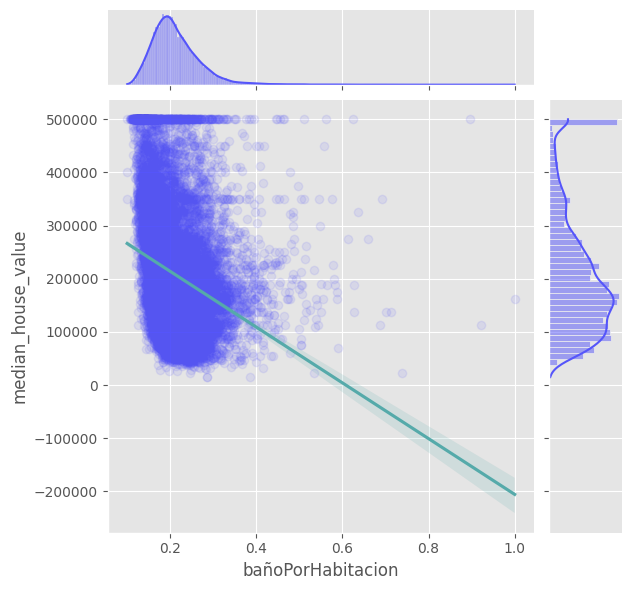

In [49]:
sns.jointplot(data = trainSetCopy, x = "bañoPorHabitacion", y = "median_house_value",  kind = 'reg', color='#5555fa',
             joint_kws = {'line_kws':{'color':'#55aaaa'}, 'scatter_kws': {'alpha': 0.1}})

plt.show()

Vemos que la nueva variable *bañoPorHabitacion* esta mucho más correlacionada con el precio medio de las casas que el número total de baños o el número total habitaciones por distrito. Aparentemente, casas con un ratio bajo de baños/habitación tienden a ser más caras.

Antes de empezar a pensar en un modelo, en entrenarlo y medir su performance es importante analizar los datos para obtener pistas o *insights*, que nos permitan entender mejor a los mismos y así sacar provecho.

Esto es un **proceso iterativo**, el cual mejora con la práctica y la experiencia.

## <span style='color:#f06553'>Preparando los datos para los algoritmos de ML</span>

Estamos en condiciones de preparar los datos para entrenar nuestro modelo de ML.

Para esto deberemos generar funciones o bien aprovechar métodos ya existentes, por varias razones,

- Podemos reproducir las transformaciones sobre los datos facilmente sobre cualquier dataset.
- Con el tiempo, es probable que se contruya una librería de funciones que transformen los datos según nuestras necesidades y que puedan volver a usarse en otros proyectos.
- Podemos utilizar estas funciones en un sistema en tiempo real para transformar datos nuevos antes de pasarselos al modelo entrenado.
- Podemos probar diferentes transformaciones y probarlas para ver cuál o qué combinaciones funcionan mejor.

### <span style='color:#229954'>Separando *labels* y obteniendo la *matriz de característica*</span>
Vamos a separar los datos contenidos en *trainSetCopy* en dos, en una parte tendremos la matriz de características, la cual suele llamarse $X$, y en otro el *target vector* o vector de blancos, el cual suele llamarse $y$.

In [50]:
mc = trainSetEstratificado.copy().drop("median_house_value", axis=1) #mc = matriz de características
labels = trainSetCopy["median_house_value"].copy() #target vector

In [51]:
print(mc.shape)
print(labels.shape)

(16512, 9)
(16512,)


### <span style='color:#229954'>Limpieza de datos</span>

La mayoría de los algoritmos de ML no pueden trabajar con datos faltantes. Al principio vimos que la columna *total_bedrooms* tenía algunos datos faltantes.

Tenemos tres opciones básicas -aunque existen enfoques más complejos- para solucionar estos datos faltantes,

1. Deshacernos esos distritos.
2. Deshacernos de la columna completa.
3. Setear valores según alguna medida (cero, media, mediana, otras).

In [52]:
##Veamos

# housing.dropna(subset=["total_bedrooms"]) # opción 1
# housing.drop("total_bedrooms", axis=1) # opción 2
medianaSetEntrenamiento = mc["total_bedrooms"].median() # opción 3
mc["total_bedrooms"].fillna(medianaSetEntrenamiento, inplace=True)

In [53]:
mc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


Podemos ver que no tenemos valores nulos en los datos contenidos en la *matriz de caracteristicas*.

##### Importante

Si utilizamos la opción 3, deberemos computar la mediana y **guardarla**. Necesitaremos la mediana para reemplazar valores perdidos (si los hubiera) en el set de testeo cuando quisiéramos evaluar nuestro modelo o sistema, y también cuando implementemos el modelo/sistema en tiempo real para reemplazar valores perdidos en nuevos set de datos.

### Imputadores de *Scikit-Learn*

La API de Scikit-Learn ofrece algunas herramientas para trabajar con valores faltantes. Uno de estos es el método *[SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)*.

Primero debemos crear una instancia de SimpleImputer y luego "*entrenarlo*" con los datos que tenemos.

Veamos.

In [54]:
from sklearn.impute import SimpleImputer

imputador = SimpleImputer(strategy="median")

In [55]:
imputadorMedianas = imputador.fit(mc.drop("ocean_proximity", axis = 1))

Analicemos qué datos contiene *imputadorMedianas*.

In [56]:
mc_nums = mc.drop("ocean_proximity", axis = 1) #sacamos columna de variable categórica
print(imputadorMedianas.statistics_)
print()
print(mc_nums.median().values)

[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]

[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]


Vemos que el imputador *imputadorMedianas* solo contiene las medianas de las variables numéricas de mi matriz de características.

Sin embargo, ahora podemos usar este impuitador *entrenado* para *transformar* nuestros datos, en este caso, la transformación implica rellenar los valores vaciós o faltantes en las diferentes columnas por la correspondiente mediana.

In [57]:
X_prueba = imputadorMedianas.transform(mc_nums)
X_prueba[:2]

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01,  3.8730e+03,  7.9700e+02,
         2.2370e+03,  7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00,  5.3200e+03,  8.5500e+02,
         2.0150e+03,  7.6800e+02,  6.3373e+00]])

La variable *X_prueba* es un arreglo del tipo *numpy.array*, podríamos volver a transformarlo en un DataFrame sencillamente haciendo lo siguiente.

In [58]:
matrizCaracteristicas_tr = pd.DataFrame(X_prueba,
                                        columns=mc_nums.columns,
                                        index=mc_nums.index)
matrizCaracteristicas_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [59]:
matrizCaracteristicas_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


Como podemos notar, utilizando el imputador dado por *Scikit-Learn* obtenemos un set de entrenamiento sin valores faltantes, similarmente a lo que obtuvimos al hacer,

```python
mc["total_bedrooms"].fillna(medianaSetEntrenamiento, inplace=True)
```

**NOTA:** Observar que para usar el *SimpleImputer* hemos quitado la columna de *ocean_proximity* ya que esta es una variable categórica. Deberemos agregarla luego a mi set de entrenamiento antes de entrenar el modelo.

## <span style='color:#f06553'>Manejando texto y variables categóricas</span>

Todos los algoritmos de ML requieren *números* para entrenarse y posteriormente para hacer algo. Por lo tanto, ¿qué hacemos con las columnas/variables que contienen texto? Debemos de alguna manera *pasarlas a números*.

Ahora bien, en el caso de nuestros datos, tenemos la columna *ocean_proximity* que nos da información acerca de qué tan cerca o lejos del oceano está cierto distrito.

Recordemos qué datos contiene.

In [61]:
categ_mc = mc[["ocean_proximity"]]
categ_mc.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


Podemos ver que no es un texto cualquiera, claramente tenemos categorías limitadas. Por lo tanto, debemos convertir estas categorías a valores numéricos.

Scikit-Learn ofrece un método útil para lograr eso, llamado *[OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html)*.

In [62]:
from sklearn.preprocessing import OrdinalEncoder

In [63]:
#Generamos una instancia de OrdinalEncoder
codificador = OrdinalEncoder()

In [64]:
#Entrenamos y transformamos los datos
categ_mc_codificado = codificador.fit_transform(categ_mc)
print(codificador.categories_)

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [65]:
print(categ_mc_codificado[:10])

[[1.]
 [4.]
 [1.]
 [4.]
 [0.]
 [3.]
 [0.]
 [0.]
 [0.]
 [0.]]


Podemos ver que la variable *categ_mc_codificado* ahora contiene valores numéricos. Cada número se corresponde a una categoría, a modo de ejemplo, el valor $0$ representa "*\<1H OCEAN* ", el $1$ corresponde a "*INLAND*", etc.

#### <span style='color:#229954'>OneHotEncoder versus OrdinalEncoder</span>

En algunos casos, la categorización del tipo *ordinal* puede ser un problema, ya que los algoritmos de ML asumen que dos valores cercanos entre sí son *más similares* que aquellos distantes. Esto podría estar bien en algunos casos, por ejemplo, para categorias ordenadas -malo, bueno, muy bueno, excelente-, pero este no es el caso para el set de datos que tenemos. Evidentemente las categorías $0$ (*\<1H OCEAN*) y $4$ (*NEAR OCEAN*) son más similares que la $0$ y $1$.

Para solucionar esto debemos utilizar lo que se conoce como *dummy variables*. Scikit-Learn ofrece un método para generar variables *dummy*, el mismo es *[OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)*. Este método lo que hace es una columna por categoría, cada categoría contiene valores $1$ y $0$, es decir, la columna correspondiente a *\<1H OCEAN* tendrá un $1$ cuando la variable sea igual a *\<1H OCEAN* y $0$ en otro caso. Lo mismo para cada una de las otras categorías.

Veamos esto en acción.

In [66]:
from sklearn.preprocessing import OneHotEncoder

ohencoder = OneHotEncoder()

In [67]:
categ_mc_oh = ohencoder.fit_transform(categ_mc) #entrenamos y transformamos los datos a partir de categ_mc
categ_mc_oh

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

La variable *categ_mc_oh* es un tipo especial de objeto llamado *sparse matrix* el cual es un objeto de la API de *Scikit-Learn*. Esta variable es más eficiente que los *Numpy.array* cuando se trabaja con matrices del tipo *sparse* o *dispersas*, es decir, con muchos ceros.

Cuando aplicamos *OneHotEncoder* obtenemos una matriz muy grande, la cual contiene una gran cantidad de ceros. Las *sparse matrix* son matrices reducidas, que ocupan menos memoria ya que solamente almacenan las posiciones donde tenemos un $1$.

In [68]:
print(categ_mc_oh.toarray())

[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [74]:
## Categoriías dentro de la instancia ohencoder
print(ohencoder.categories_)

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


## <span style='color:#f06553'>Escalando características - Feature Scaling</span>

Una de las cosas más importantes antes de entrenar un algoritmo o modelo de ML es **escalar** los datos de nuestro set de entrenamiento (y posteriormente el set de testeo antes de meterlo al modelo). En general, salvo pequeñas excepciones, los algoritmos no funcionan bien si los atributos numéricos poseen escalas muy diferentes. A modo de ejemplo, el número total de habitaciones en un distrito va desde 6 hasta 39320, mientras que el ingreso medio (*median_income*) va de 0 a 15. Sin embargo, no necesariamente debemos escalar el *target vector*.

Hay dos formas sencillas de escalar los atributos: *minmax* y *estandarización*.

**MinMax**

El escalamiento del tipo *min-max* lo que hace es transformar los datos de tal manera que tomen valores de $0$ a $1$, este método es también conocido como *normalización*. Esto se hace, restando el valor mínimo y dividiendo por el valor máximo menos el mínimo. Scikit-Learn provee el método *[MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)*.

**Estandarización**

Por otro lado, la *estandarización* lo que hace es, restar a cada valor, la media -de tal manera de que los valores posean media cero-, y luego se divide por el desvío estándar, resultando en una distribución con varianza unitaria. Tenemos que tener en cuenta que la estandarización no limita los valores a un rango específico como lo hace *minmax*, lo cual podría ser un problema en algunos modelos -por ejemplo, las redes neuronales esperan valores entre 0 y 1-. No obstante, la *estandarización* se ve mucho menos afectada por valores *raros* o *outliers*.

##### ADVERTENCIA

Al igual que todas las transformaciones que venimos haciendo, el escalamiento de los datos debe hacerse **solamente sobre los datos de entrenamiento**, no sobre el set de datos completo (incluyendo el set de testeo). Luego podemos usar los métodos para transformar el set de entrenamiento y el set de testeo (y también a nuevos datos).

## <span style='color:#f06553'>Pipelines</span>

Es evidente que tenemos varios pasos previos a entrenar el modelo. En ocasiones podríamos tener muchísimos más. Por lo tanto, siempre es conveniente **automatizar procesos**, esto no sólo nos ahorra tiempo y posibles errores, sino que nos permite *combinar estrategias* para probarlas y compararlas, y así quedarnos con la que mejor funcione.

Scikit-Learn provee una classe llamada *[Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)* la cual nos ayuda a crear una secuencia de transformaciones o funciones a nuestros datos.

Veamos un ejemplo sencillo.

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from utils import CombinarCaracteristicas as CombinarCaracteristicas

pipelineNumerico = Pipeline([('imputer', SimpleImputer(strategy="median")),
                             ('attribs_adder', CombinarCaracteristicas()),
                             ('std_scaler', StandardScaler())])

In [76]:
#Aplicamos este pipeline a los datos
mc_nums_tr = pipelineNumerico.fit_transform(mc_nums)

In [77]:
print(mc_nums_tr.shape)
print()
print(mc_nums_tr[:2])

(16512, 11)

[[-0.94135046  1.34743822  0.02756357  0.58477745  0.64037127  0.73260236
   0.55628602 -0.8936472   0.01739526  0.00622264 -0.12112176]
 [ 1.17178212 -1.19243966 -1.72201763  1.26146668  0.78156132  0.53361152
   0.72131799  1.292168    0.56925554 -0.04081077 -0.81086696]]


#### <span style='color:#229954'>Agregando transformaciones de variables categóricas a nuestro *pipeline*</span>

Lo anterior nos permite de una manera clara y sencilla, agrupar los tres tipos de transformaciones que hemos estado trabajando de manera separada.

Ahora bien, estas transformaciones han sido realizadas sobre datos numéricos. Sería interesante aplicar también alguna transformación a los datos categóricos, como por ejemplo, conver las variables categóricas de *ocean_proximity* a *OneHotEncoder*.

Por suerte, Scikit-Learn nos ofrece el método *[ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)*.

In [78]:
from sklearn.compose import ColumnTransformer

nCaracteristicas = list(mc_nums) #lista de características

caracCateg = ["ocean_proximity"] #características/columnas que son variables categóricas

pipelineCompleto = ColumnTransformer([("num", pipelineNumerico, nCaracteristicas),
                                      ("cat", OneHotEncoder(), caracCateg),])
pipelineCompleto

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('attribs_adder',
                                                  CombinarCaracteristicas()),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income']),
                                ('cat', OneHotEncoder(), ['ocean_proximity'])])

La clase *[ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)* requiere para ser inicaido, una lista de tuplas, donde cada tupla contiene un nombre, un transformador y una lista de nombres (o índices) de las columnas de nuestro set de datos a las cuales queremos aplicar el pipeline.

In [79]:
#Obtenemos la Matriz de Característica a partir del set de entrenamiento original.
mcPreparada = pipelineCompleto.fit_transform(trainSetCopy)

In [80]:
print(mcPreparada.shape)
print()
print(mcPreparada[:1])

(16512, 16)

[[-0.94135046  1.34743822  0.02756357  0.58477745  0.64037127  0.73260236
   0.55628602 -0.8936472   0.01739526  0.00622264 -0.12112176  0.
   1.          0.          0.          0.        ]]


La línea de código,

```python
mcPreparada = pipelineCompleto.fit_transform(trainSetCopy)
```

nos permite obtener un arreglo del tipo *numpy.array* con los datos ya preparados para entrenar un modelo de ML. La metodología de trabajo utilizando *pipelines* es realmente potente, ya que nos deja en claro qué transformaciones se aplican a nuestros datos y además nos permitiría "jugar" con hyperparámetros y diferentes transformaciones para probar, como hemos dicho, diferentes estrategias.

## <span style='color:#f06553'>Seleccionando y entrenando un modelo de ML</span>

Estamos en condiciones de entrenar y probar algunos modelos de ML. 

- Hemos separado el set de datos en un set de entrenamiento y un set de testeo.
- Hemos implementado un *pipeline* para limpiar y transformar los datos.

### <span style='color:#229954'>Entrenando y evaluando sobre el set de entrenamiento</span>

Vamos a entrenar y probar los siguientes algoritmos de ML sobre el set de entrenamiento.

- LinealRegression
- DecisionTreeRegressor
- RandomForestRegressor

#### <span style='color:#229954'>Regresión Lineal</span>

Utilizaremos la clase *[LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)* de Scikit-Learn.

La idea de un regresor lineal es entrenar un modelo lineal con coeficiones $w=w_1,...,w_p$ que minimice la suma al cuadrado de los valores obtenidos por el predictor y los valores reales del set de datos.

Todos los modelos de la API de Scikit-Learn poseen diferentes cantidades de *hiperparámetros*, los cuales son interestanes para estudiar ya que cambios en estos hiperparámetros dan diferentes resultados en cuanto a la performance del modelo.

In [81]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression() #instanciamos un modelo nuevo

Una vez instanciado el modelo estamos en condiciones de entrenarlo.

In [82]:
lr.fit(mcPreparada, labels) #entrenamos el regresor con los datos

LinearRegression()

Una vez entrenado, podemos hacer un rápido chequeo del funcionamiento del mismo.

Primero tomamos algunos datos y etiquetas desde el set de datos de entrenamiento **crudo**, es decir, sin prepararlo.

In [83]:
algunosDatos = trainSetCopy.iloc[:5]
algunasLabels = labels.iloc[:5]
algunosDatos

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,habitacionPorCasa,bañoPorHabitacion,poblacionPorHogar
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,6.096552,0.182692,3.167241


Ahora vamos a preparar los datos antes de predecir con el modelo.

In [84]:
algunosDatosPreparados = pipelineCompleto.transform(algunosDatos)
algunosDatosPreparados.shape

(5, 16)

Ahora usamos el modelo para predecir valores.

In [85]:
lr_predicciones = lr.predict(algunosDatosPreparados)

In [86]:
print("Predicciones:", np.round(lr_predicciones,2))
print("Labels:", algunasLabels.values)
print("Errores:", np.round(algunasLabels.values - lr_predicciones)/algunasLabels.values*100)

Predicciones: [ 85657.9  305492.61 152056.46 186095.71 244550.68]
Labels: [ 72100. 279600.  82700. 112500. 238300.]
Errores: [-18.80443828  -9.26072961 -83.86457074 -65.41866667  -2.62316408]


¡Nuestro modelo funciona! No obstante, podemos ver que en algunos casos, la diferencia entre el valor obtenido por el modelo y el valor real es bastante grande.

Midamos la performance de este modelo utilizando lo que se conoce como *Error medio cuadrático* o *RMSE*.

In [87]:
from sklearn.metrics import mean_squared_error

predicciones = lr.predict(mcPreparada)

mse = mean_squared_error(labels, predicciones)
root_mse = np.sqrt(mse)
np.round(root_mse,2)

68627.87

Vemos que el error es de unos $\$68627.87$USD, lo cual es peor que nada. No obstante, debemos notar que los valores de la variable *median_housing_values* rondan los $\$120000$USD a $\$265000$USD, podríamos estar ante un problema llamado *underfitting*. Cuando esto pasa, es porque estamos el set de datos no provee suficiente información o bien el modelo no es lo suficientemente bueno. No obstante, aún podríamos (y sugiero fuertemente) que se siga trabajando sobre los datos para obtener mejores resultados.

#### <span style='color:#229954'>Decision Tree Regressor</span>

A continuación utilizaremos un modelo llamado [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) el cual es muy potente para encontrar complejas y no lineales relaciones entre las variables.

In [88]:
from sklearn.tree import DecisionTreeRegressor

treeReg = DecisionTreeRegressor() #generamos una instancia del modelo

In [89]:
#Entrenamos el modelo
treeReg.fit(mcPreparada, labels)

DecisionTreeRegressor()

In [90]:
# Predecimos sobre algunos datos

treePredictions = treeReg.predict(algunosDatosPreparados)

print("Predicciones:", np.round(treePredictions,2))
print("Labels:", algunasLabels.values)
print("Errores:", np.round(algunasLabels.values - treePredictions)/algunasLabels.values*100)

Predicciones: [ 72100. 279600.  82700. 112500. 238300.]
Labels: [ 72100. 279600.  82700. 112500. 238300.]
Errores: [0. 0. 0. 0. 0.]


*¿Podemos decir que el modelo DecisionTreeRegressor funciona perfectamente?*

Estamos ante un problema llamado **overfitting**. Es decir, el modelo se ajusta perfectamente a los datos de entrenamiento, y no generaliza, lo cual es **muy peligroso**. El hecho de que nuestro modelo genere overfitting tiene sentido, hemos entrenado el modelo y lo hemos probado sobre los mismos datos, y en realidad deberíamos probar el modelo sobre datos nuevos.

### <span style='color:#229954'>Set de *validación*</span>

No obstante, antes de probar algún modelo sobre el set de datos de testeo debemos estar seguros/as de que nuestro modelo funciona lo mejor posible.

Por lo tanto, lo que vamos a hacer es **usar el set de entrenamiento para entrenar y para validar el modelo**.

## <span style='color:#f06553'>Validación cruzada</span>

Scikit-Learn ofrece un método llamado *[K-fold cross-validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html)* el cual cuenta con una buena guía de uso en su [documentación](https://scikit-learn.org/stable/modules/cross_validation.html#k-fold). El método de validación cruzada o *Cross Validation* permite tomar un set de datos y dividirlos en $n$ subsets conocidos como *folds*. Luego lo que se hace es tomar un *fold* como set de validación y el resto como entrenamiento.

En las siguientes líneas de código se generan $10$ folds y luego se prueba el modelo de *DecisionTreeRegressir*.

In [91]:
from sklearn.model_selection import cross_val_score

puntajes = cross_val_score(treeReg, mcPreparada, labels,
                         scoring="neg_mean_squared_error", cv=10)

In [92]:
treeRMSScores = np.sqrt(-puntajes)
treeRMSScores

array([72805.29969779, 70517.62521111, 69164.84851209, 70347.53914931,
       68248.36307771, 78505.99100578, 69745.63731135, 72905.13843992,
       68279.36731375, 71513.48011105])

In [93]:
## definimos una función para mostrar los puntajes obtenidos
def mostrarPuntajes(puntajes):
    print("Puntajes:", np.round(puntajes,2))
    print()
    print("Media:", np.round(puntajes.mean(),2))
    print()
    print("Desvío estándar:", np.round(puntajes.std(),2))

In [94]:
mostrarPuntajes(treeRMSScores)

Puntajes: [72805.3  70517.63 69164.85 70347.54 68248.36 78505.99 69745.64 72905.14
 68279.37 71513.48]

Media: 71203.33

Desvío estándar: 2892.26


Ahora vemos que el modelo *DecisionTreeRegressor* no funciona tan bien como parecía, de hecho, parece funcionar peor que el regresor lineal entrenado previamente.

Hagamos lo mismo apra el regresor lineal y comparemos.

In [95]:
puntajeslr = cross_val_score(lr, mcPreparada, labels,
                         scoring="neg_mean_squared_error", cv=10)

In [96]:
lrRMSScores = np.sqrt(-puntajeslr)
mostrarPuntajes(lrRMSScores)

Puntajes: [71762.76 64114.99 67771.17 68635.19 66846.14 72528.04 73997.08 68802.34
 66443.29 70139.8 ]

Media: 69104.08

Desvío estándar: 2880.33


Claramente el modelo *DecisionTreeRegressor*, que mostró un error de $0$ no funcionaba correctamente. Claramente tuvimos *overfitting*.

#### <span style='color:#229954'>Random Forest Regressor</span>

Probemos ahora un modelo llamado *Random Forest Regressor*, según la documenación oficial, el *[RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)* es,

*... a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.*

En otras palabras, los bosques aleatorios (random forests) lo que hacen es entrenar muchos árboles de decisiones tomando aleatoriamente subsets del set de características, luego promedia las predicciones. Aquellos modelos que se generan a partir de muchos otros modelos entran en una rama del Machine Learning conocida en inglés como *Ensemble Learning*

**Nota:** Vamos a utilizar *cross validation* para ver que tan bien funciona el random forest, no obstante sólo utilizaremos $5$ folds porque el modelo es muy complejo y requiere bastante más tiempo para entrenar y clasificar los set de datos.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

randomForest = RandomForestRegressor() #instanciamos el modelo
randomForest.fit(mcPreparada, labels) #entrenamos el modelo

In [ ]:
## Realizamos cross validation
puntajesRandomForest = cross_val_score(randomForest, mcPreparada, labels, scoring="neg_mean_squared_error", cv=5)

In [ ]:
puntajesRandomForest = np.sqrt(-puntajesRandomForest)
mostrarPuntajes(puntajesRandomForest)

¡Opa! Este modelo parece funcionar bastante mejor que los dos anteriores, no obstante aún podemos seguir haciendo pruebas y probar este modelo, que al parecer, va por buen camino.

## <span style='color:#f06553'>*Tuneando* nuestros modelos</span>

Supongamos que queremos probar diferentes hiperparámetros del *RandomForestRegressor*. Una posibilidad es hacerlo a mano, es decir, ir camabiando cada hiperparámetro, entrenar el modelo, guardar los resultados y comprarlos con cada combinación para obtener el mejor. Esto puede ser tedioso y también producir errores.

Por suerte, Scikit-Learn ofrece un método llamado *[GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)* el cual hace lo que necesitamos por nosotros. Todo lo que debemos hacer es decirle con cuales hiperparámetros queremos experimentar y con que valores. Luego utilizará *cross validation* para evaluar todas las posibles combinaciones.

A modo de ejemplo, veamos el siguiente trozo de código.

```python
from sklearn.model_selection import GridSearchCV

grillaHiperparametros = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
              {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},]

randomForestReg = RandomForestRegressor()

resultadoGrilla = GridSearchCV(randomForestReg, grillaHiperparametros,
                               cv=5,
                               scoring = 'neg_mean_squared_error',
                               return_train_score = True)
resultadoGrilla.fit(mcPreparada, labels)
```

Cuando ejecutemos *resultadoGrilla.fit()* lo primero que se evaluará son todas las combinaciones dadas por $n\_{estimators}\times max\_features$ del primer diccionario, es decir $3\times4=12$ combinaciones. Luego realizará $2\times3=6$ combinaciones dadas en el segundo diccionario.

Por lo tanto, la grilla realizará $12+6=18$ combinaciones de hiperparámetros del modelo *RandomForestRegressor*. Ahora bien, hemos seteado el parámetro *cv* de *GridSearchCV()* en 5, por lo tanto realizaremos $5$ validaciones cruzadas, lo que implica un total de ¡$18\times5=90$ combinaciones para entrenamiento! Es importante tener en cuenta que dependiendo la cantidad de combinaciones a implementar y del tamaño del set de entrenamiento, podemos requerir mucho tiempo para evaluar la performance de nuestros modelos.

Veamos un ejemplo de implementación de *GridSearchCV* para el modelo *RandomForestRegressor*.

In [ ]:
from sklearn.model_selection import GridSearchCV

grillaHiperparametros = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
              {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},]

randomForestReg = RandomForestRegressor()

resultadoGrilla = GridSearchCV(randomForestReg, grillaHiperparametros,
                               cv=5,
                               scoring = 'neg_mean_squared_error',
                               return_train_score = True)

In [ ]:
resultadoGrilla.fit(mcPreparada, labels)

Una vez realizadas todas las combinaciones veamos cuál funcionó mejor.

In [ ]:
resutlados = resultadoGrilla.cv_results_
for media, parametros in zip(resutlados["mean_test_score"], resutlados["params"]):
    print(np.sqrt(-media), parametros)

En el ejemplo anterior obtuvimos el mejor resultado utilizando *{'max_features': 8, 'n_estimators': 30}*.

Es posible realizar mayor cantidad de combinaciones. Además, podríamos pensar en utilizar un set de datos de entrenamiento preparado de manera diferente, por ejemplo, podríamos quitar las columnas que agregamos cuando hicimos,

```python
trainSetCopy["habitacionPorCasa"] = trainSetCopy["total_rooms"]/trainSetCopy["households"]
trainSetCopy["bañoPorHabitacion"] = trainSetCopy["total_bedrooms"]/trainSetCopy["total_rooms"]
trainSetCopy["poblacionPorHogar"] = trainSetCopy["population"]/trainSetCopy["households"]
```

Y probar el modelo en un set de datos menos complejo. Tenemos muchas otras estrategias para aplicar sobre el set de datos antes de entrenar y testear un modelo.

Se deja al estudiante que haga el testeo utilizando otros clasificadores, como puede ser *Support Vector Machine*, *Regresores Lineales*, entre otros.

#### <span style='color:#229954'>Analizando el mejor modelo</span>

Ahora que tenemos una cierta cantidad de combinaciones realizadas, es hora de seleccionar el mejor e inspeccionarlo.

A modo de ejemplo, los modelos de *RandomForestRegressor* poseen un parámetro llamado *feature_importances_* que nos arroja un valor numérico indicando la importancia de cada atributo a la hora de realizar las predicciones.

In [ ]:
caracImportantes = resultadoGrilla.best_estimator_.feature_importances_ #características importantes

In [ ]:
caracImportantes

Mostremos estas importancias relativas junto a las variables que le corresponden.

In [ ]:
atributosExtra = ["habitacionPorCasa", "bañoPorHabitacion", "poblacionPorHogar"]
codificadorCat = pipelineCompleto.named_transformers_["cat"]
ohEncoder = list(codificadorCat.categories_[0])
atributos = nCaracteristicas + atributosExtra + ohEncoder
sorted(zip(np.round(caracImportantes,2), atributos), reverse=True)

Los datos anteriores nos dan una buena pista de qué características sirvieron dentro del modelo. Por ejemplo, podemos ver que la información dentro de la columna *ocean_proximity* aporta muy poco al modelo, por lo tanto, sería una buena idea sacarla del set de entrenamiento y probar el modelo nuevamente.

## <span style='color:#f06553'>Analizando el modelo sobre el set de testeo</span>

Hemos estado *jugando* con nuestro set de entrenamiento y nuestro modelo para encontrar la mejor predicción. Ahora estamos en condiciones de evaluar el modelo final sobre los datos contenidos en el set de testeo.

No hay nada raro en este proceso, solo debemos aplicar el modelo con los parámetros que mejor respondieron y predecir sobre los datos.

Veamos.

In [ ]:
modeloSeleccionado = resultadoGrilla.best_estimator_
Xtest = testSetEstratificado.drop("median_house_value", axis=1) #quitamos la columna que hará de target vector
ytest = testSetEstratificado["median_house_value"].copy()

XtestPreparado = pipelineCompleto.transform(Xtest)

Una vez que tenmos los datos de testeo preparados para usarlos en el modelo, vamos a predecir los precios.

In [ ]:
prediccionesFinales = modeloSeleccionado.predict(XtestPreparado)

Veamos el error que obtenemos

In [ ]:
MSEfinal = mean_squared_error(ytest, prediccionesFinales)
np.sqrt(MSEfinal)

Eso es todo... Por ahora.

# <center> <span style='color:#3c3b5f'>FIN</span></center>